In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

In [3]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/5
750/750 [==============================] - 25s 32ms/step - loss: 0.2101 - accuracy: 0.9365 - val_loss: 0.0739 - val_accuracy: 0.9779
Epoch 2/5
750/750 [==============================] - 13s 18ms/step - loss: 0.0586 - accuracy: 0.9820 - val_loss: 0.0538 - val_accuracy: 0.9851
Epoch 3/5
750/750 [==============================] - 17s 23ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0447 - val_accuracy: 0.9872
Epoch 4/5
750/750 [==============================] - 25s 34ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0466 - val_accuracy: 0.9877
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0377 - accuracy: 0.9880
Test accuracy: 0.9879999756813049


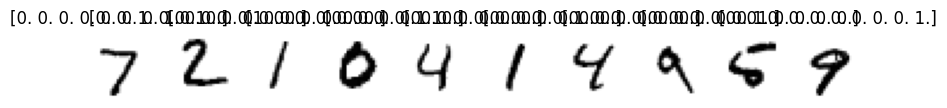

In [13]:
def display_images(images, labels):
    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='binary')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

display_images(test_images[:10], test_labels[:10])


In [14]:

predictions = model.predict(test_images[:10])
predicted_labels_display = np.argmax(predictions, axis=1)

print("Predicted labels:", predicted_labels_display)

1/1 [==============================] - 0s 63ms/step
Predicted labels: [7 2 1 0 4 1 4 9 5 9]


In [10]:
from sklearn.metrics import f1_score

In [16]:


test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

f1 = f1_score(true_labels, predicted_labels, average='weighted')
print('F1 Score:', f1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0362 - accuracy: 0.9886
Test accuracy: 0.9886000156402588
313/313 [==============================] - 1s 4ms/step
F1 Score: 0.988602129869324
